In [63]:
import pandas as pd
import math
import nltk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
bot_data_path = "BotUserData/BotUserData.csv"
verified_data_path = "VerifiedUserData/VerifiedUserData.csv"

In [64]:
def load_csv_into_dataframe(data_path):
    return pd.read_csv(data_path, header=0, sep=",")

In [69]:
bot_df = load_csv_into_dataframe(bot_data_path)
# verified_df = load_csv_into_dataframe(verified_data_path)

# bot_df.head()
# verified_df.head()

### I made an initial assumption that the less information a user shares the more likely they are to be a bot. Below we will calculate the percentage of bots that are missing optional column values such as "location". Additionally, we will calculate the percentage of bots that are using the default profile, default profile image, and whether or not they are geo_enabled


In [47]:
bot_df.isnull().sum()

id                          0
username                    0
screen_name                 0
location                 1401
url                      3960
description               343
followers                   0
following                   0
favorite_count              0
tweet_count                 0
created_at                  0
time_zone                3163
geo_enabled                 0
language                    0
profile_image_url           0
default_profile             0
default_profile_image       0
dtype: int64

In [49]:
verified_df.isnull().sum()

id                                                                                                                                                         0
username                                                                                                                                                   1
screen_name                                                                                                                                                0
location                                                                                                                                                2964
url                                                                                                                                                     7226
description                                                                                                                                             2928
followers                                                 

In [5]:
bot_location_incomplete_percent = sum(pd.isnull(bot_df['location'])) / len(bot_df) * 100
print("Percentage of bots without a location: ", str(round(bot_location_incomplete_percent, 2)))

bot_url_incomplete_percent = sum(pd.isnull(bot_df['url'])) / len(bot_df) * 100
print("Percentage of bots without a url: ", str(round(bot_url_incomplete_percent, 2)))

bot_description_incomplete_percent = sum(pd.isnull(bot_df['description'])) / len(bot_df) * 100
print("Percentage of bots without a description: ", str(round(bot_description_incomplete_percent, 2)))

bot_timezone_incomplete_percent = sum(pd.isnull(bot_df['time_zone'])) / len(bot_df) * 100
print("Percentage of bots without a time-zone: ", str(round(bot_timezone_incomplete_percent, 2)))

bot_geoenabled_percent = sum(bot_df['geo_enabled']) / len(bot_df) * 100
print("Percentage of bots geo-enabled: ", str(round(bot_geoenabled_percent, 2)))

bot_default_profile_percent = sum(bot_df['default_profile']) / len(bot_df) * 100
print("Percentage of bots using default profile: ", str(round(bot_default_profile_percent, 2)))

bot_default_profile_image_percent = sum(bot_df['default_profile_image']) / len(bot_df) * 100
print("Percentage of bots using default profile image: ", str(round(bot_default_profile_image_percent, 2)))

Percentage of bots without a location:  25.33
Percentage of bots without a url:  71.6
Percentage of bots without a description:  6.2
Percentage of bots without a time-zone:  57.19
Percentage of bots geo-enabled:  29.07
Percentage of bots using default profile:  61.63
Percentage of bots using default profile image:  2.5


Average number of tweets for a bot:  72107.19
Tweet count standard deviation for bots:  107561.75997063734
Bot tweets range from  25 - 1796378


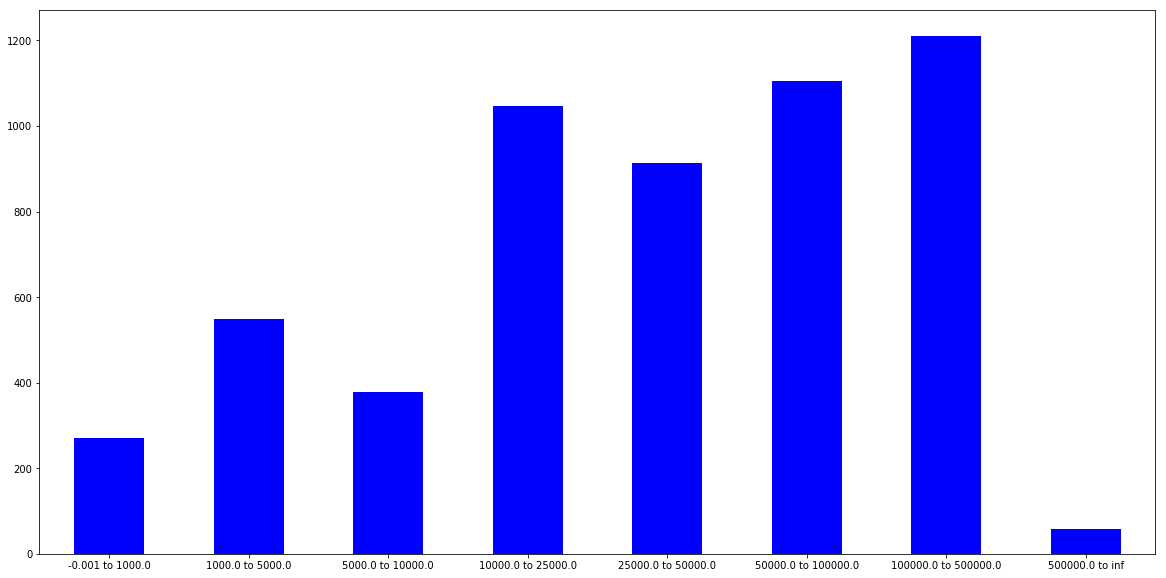

In [6]:
# Calculate the average number of tweets for bot users
#
bot_average_tweets = sum(bot_df['tweet_count']) / len(bot_df)
print("Average number of tweets for a bot: ", str(round(bot_average_tweets, 2)))

# Calculate standard deviation of tweet count
#
print("Tweet count standard deviation for bots: ", bot_df['tweet_count'].std())

# Calculate the range of tweet count
#
bot_max_tweets = bot_df['tweet_count'].max()
bot_min_tweets = bot_df['tweet_count'].min()
print("Bot tweets range from ",bot_min_tweets, "-", bot_max_tweets )

# Graph the frequency of each tweet count bin
#
out = pd.cut(bot_df['tweet_count'], bins=[0, 1000, 5000, 10000, 25000, 50000, 100000, 500000, math.inf], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(20,10))
ax.set_xticklabels([(str(c.left) + " to " + str(c.right)) for c in out.cat.categories])
plt.show()

Average number of favorites for a bot:  35524.31
Favorite count standard deviation for bots:  54834.33456751534
Bot tweets range from  0 - 1262898


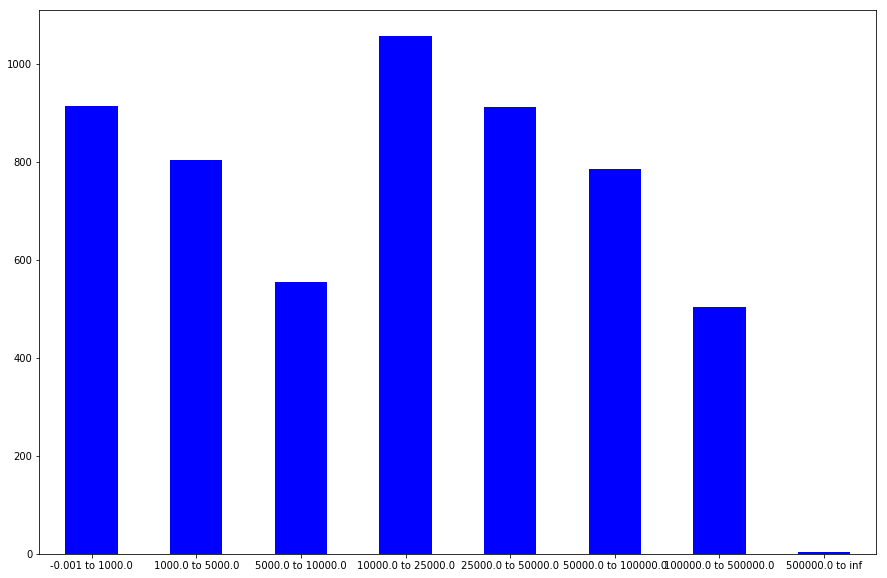

In [7]:
# Calculate the average number of favorites (likes) for bot users
#
bot_average_favorites = sum(bot_df['favorite_count']) / len(bot_df)
print("Average number of favorites for a bot: ", str(round(bot_average_favorites, 2)))

# Calculate standard deviation of favorite count
#
print("Favorite count standard deviation for bots: ", bot_df['favorite_count'].std())

# Calculate the range of favorite count
#
bot_max_favorites = bot_df['favorite_count'].max()
bot_min_favorites = bot_df['favorite_count'].min()
print("Bot tweets range from ",bot_min_favorites, "-", bot_max_favorites )

# Graph the frequency of each favorite count bin
#
out = pd.cut(bot_df['favorite_count'], bins=[0, 1000, 5000, 10000, 25000, 50000, 100000, 500000, math.inf], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,10))
ax.set_xticklabels([(str(c.left) + " to " + str(c.right)) for c in out.cat.categories])
plt.show()

Average number of followers for a bot:  42983.9
Follower count standard deviation for bots:  206026.15884864517
Bot followers range from  0 - 4621689


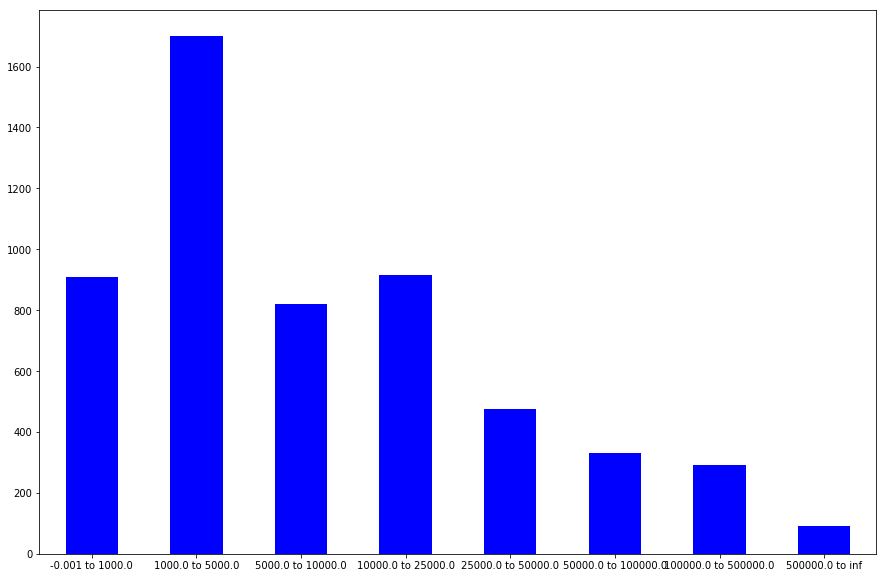

In [8]:
# Calculate the average number of followers for bot users
#
bot_average_followers = sum(bot_df['followers']) / len(bot_df)
print("Average number of followers for a bot: ", str(round(bot_average_followers, 2)))

# Calculate standard deviation of follower count
#
print("Follower count standard deviation for bots: ", bot_df['followers'].std())

# Calculate the range of follower count
#
bot_max_followers = bot_df['followers'].max()
bot_min_followers = bot_df['followers'].min()
print("Bot followers range from ",bot_min_followers, "-", bot_max_followers)

# Graph the frequency of each followers count range
#
out = pd.cut(bot_df['followers'], bins=[0, 1000, 5000, 10000, 25000, 50000, 100000, 500000, math.inf], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,10))
ax.set_xticklabels([(str(c.left) + " to " + str(c.right)) for c in out.cat.categories])
plt.show()

On average a bot follows:  34738.3  accounts
Following count standard deviation for bots:  179894.2924493938
Bot followering count ranges from  3 - 4463086


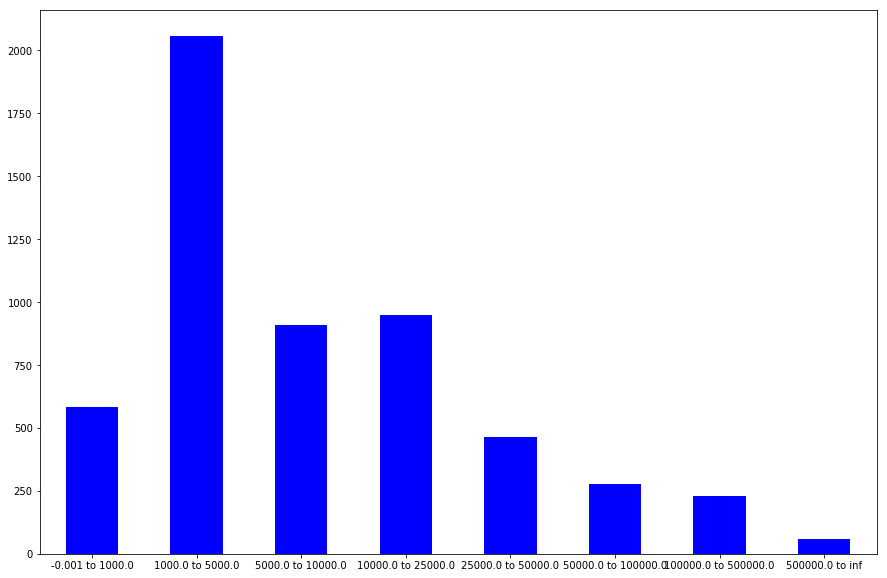

In [9]:
# Calculate the average number of accounts a bot follows
#
bot_average_followers = sum(bot_df['following']) / len(bot_df)
print("On average a bot follows: ", str(round(bot_average_followers, 2)), " accounts")

# Calculate standard deviation of following count
#
print("Following count standard deviation for bots: ", bot_df['following'].std())

# Calculate the range of following count
#
bot_max_following = bot_df['following'].max()
bot_min_following = bot_df['following'].min()
print("Bot followering count ranges from ",bot_min_following, "-", bot_max_following)

# Graph the frequency of each following count range
#
out = pd.cut(bot_df['following'], bins=[0, 1000, 5000, 10000, 25000, 50000, 100000, 500000, math.inf], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,10))
ax.set_xticklabels([(str(c.left) + " to " + str(c.right)) for c in out.cat.categories])
plt.show()

### When looking over bot accounts I noticed that a lot of account seem to have the same number of followers and following. I decided to calculate this ratio and add it to the dataframe anticipating that regular users ratio of followers / following will be drastically different.

Average followers / following ratio:  1.4
followers / following ratio standard deviation for bots:  10.210599646733911
followers / following ratio ranges from  0.0 - 627.0304164716893


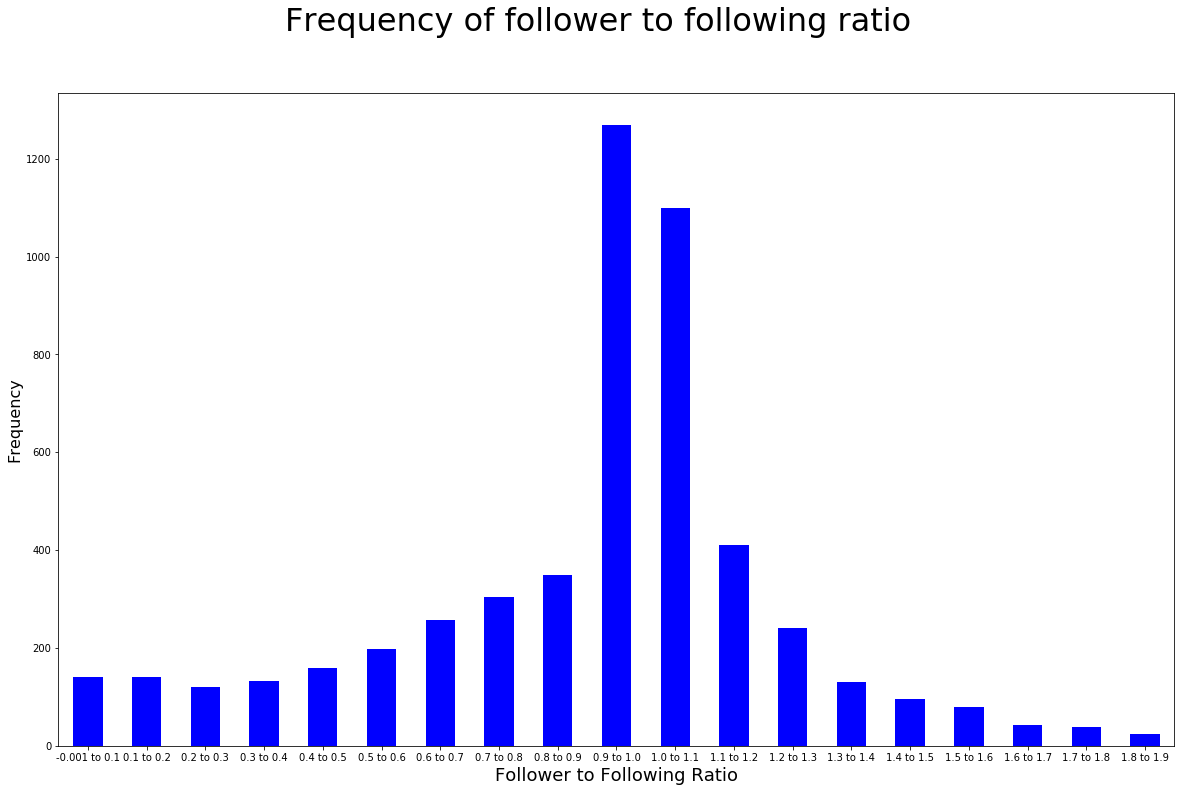

In [10]:
bot_df['followers_to_following_ratio'] = bot_df.apply(lambda x: x['followers'] if x['following'] < 1 else x['followers'] / x['following'], axis=1)
# bot_df.head()

# Calculate the average ratio for a bot
#
bot_average_ratio = sum(bot_df['followers_to_following_ratio']) / len(bot_df)
print("Average followers / following ratio: ", str(round(bot_average_ratio, 2)))

# Calculate standard deviation of follower / following ratio
# 
print("followers / following ratio standard deviation for bots: ", bot_df['followers_to_following_ratio'].std())

# Calculate the range of follower / following ratio
#
bot_max_ratio = bot_df['followers_to_following_ratio'].max()
bot_min_ratio = bot_df['followers_to_following_ratio'].min()
print("followers / following ratio ranges from ",bot_min_ratio, "-", bot_max_ratio)

# Graph the frequency of each ratio
#
fig = plt.figure()
out = pd.cut(bot_df['followers_to_following_ratio'], bins= np.linspace(0,2,20,endpoint=False), include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(20,12))
ax.set_xticklabels([(str(c.left) + " to " + str(c.right)) for c in out.cat.categories])
plt.suptitle("Frequency of follower to following ratio", size=32)
plt.xlabel('Follower to Following Ratio', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
fig.savefig('test.png')
plt.show()

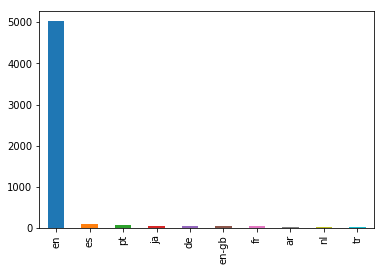

In [11]:
# graph languages used by the bot accounts
#
fig, ax = plt.subplots()
bot_df['language'].value_counts().nlargest(10).plot(ax=ax, kind='bar')

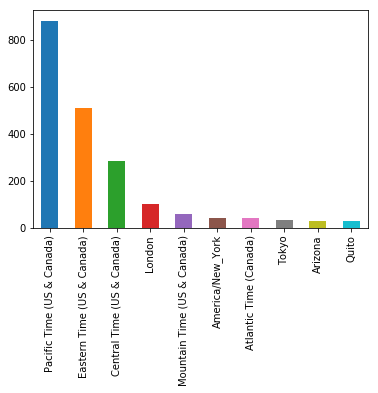

In [12]:
# graph time-zones used by the bot accounts
#
fig, ax = plt.subplots()
bot_df['time_zone'].value_counts().nlargest(10).plot(ax=ax, kind='bar')

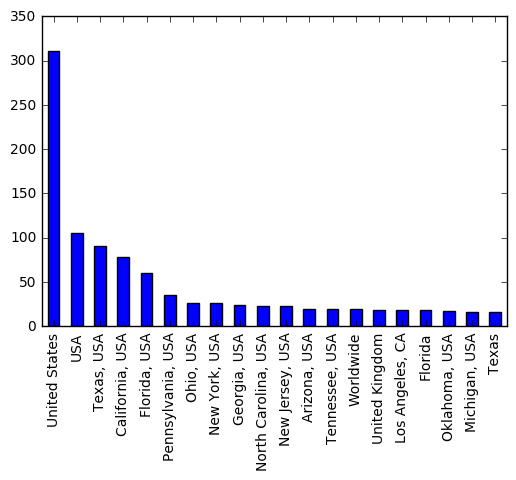

In [47]:
# graph locations used by the bot accounts
#
fig, ax = plt.subplots()
bot_df['location'].value_counts().nlargest(20).plot(ax=ax, kind='bar')

### Here we want to do so analysis on the description the bots have entered. Such as the most commonly used words, number of hastags, and number of emojis

              Frequency
Word                   
maga               1613
trump               936
conservative        534
love                532
https               490
2a                  485
god                 453
nra                 434
🇺🇸                  427
christian           337
president           307
america             302
patriot             298
country             272
proud               271
follow              265
...                 263
military            248
family              232
life                216
supporter           215
american            215
trumptrain          201
trump2020           198
1a                  196


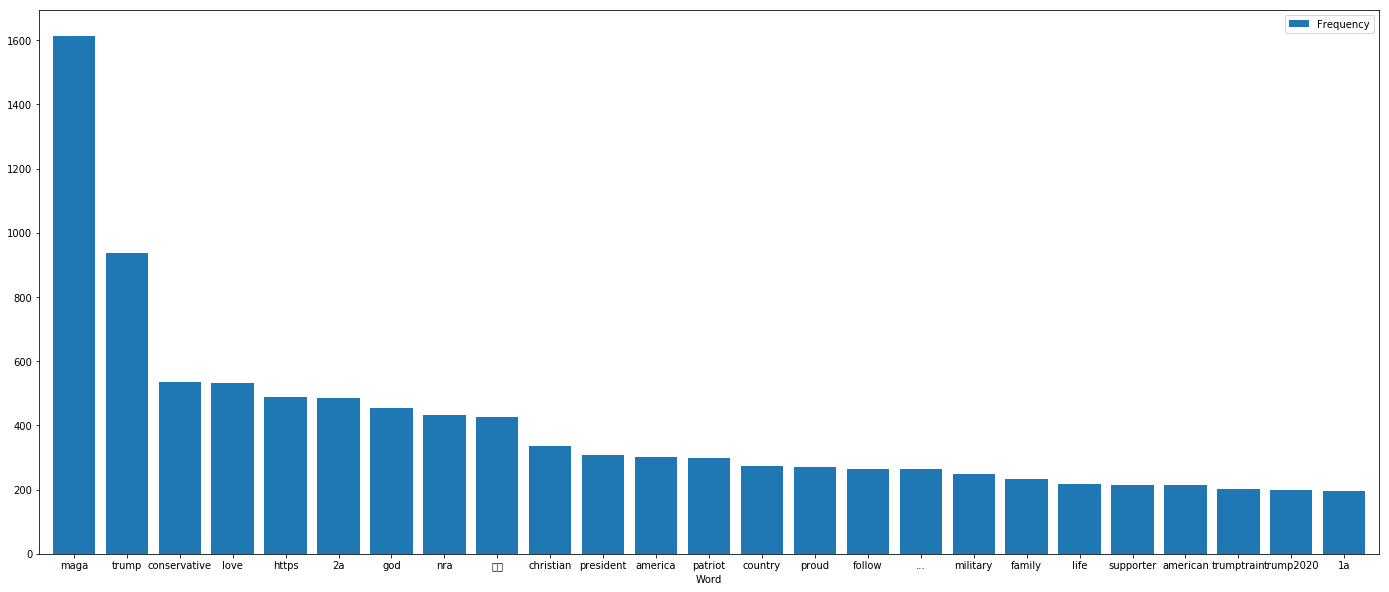

In [15]:
# These characters will appear as their own word if not removed. This results in the hashtag
# being the most common word. This characters are removed from the results
#
my_stop_words = [',', '’', '#', '.', '!', '@', '&', ':', '|', '(', ')', '\'s', ';', '-', 'n\'t', '%']

# Read in just the bot profile descriptions
#
bot_description_df = pd.read_csv(bot_data_path, usecols=['description'])
top_n = 25

# Lowercase everything in the description so words of different cases are counted the same
# Ex: Maga and MAGA
#
lowercase_descriptions = bot_description_df['description'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(lowercase_descriptions)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')

# Include the stop words I created
#
stopwords.extend(my_stop_words)

# Remove stopwords from the results
#
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

results = pd.DataFrame(words_except_stop_dist.most_common(top_n), columns=['Word', 'Frequency']).set_index('Word')
print(results)
# plot the distribution of the n most commonly used words
#
results.plot.bar(rot=0, figsize=(24, 10), width=0.8)

### Next we want to start looking at the description more in depth. I will calculate the number of hashtags and @ mentions used in each bot's description. I then add these new columns to the dataframe. 

In [31]:
# bot_description_df = pd.read_csv("DataAnalysis/BotUserData/BotUserData.csv", usecols=['description'])

bot_hashtag_counts = []
bot_at_mention_counts = []
bot_description_lengths = []

for row_index, row in bot_description_df.iterrows():
    
    hashtag_count = str(row['description']).count('#')
    at_mention_count = str(row['description']).count('@')
    
    if isinstance(row['description'], float):
        # Some descriptions are blank which Pandas converts to NaN
        # Here we assign any row with NaN in the description to have a length of -1
        #
        description_length = -1    
    else:
        description_length = len(str(row['description']))

    bot_hashtag_counts.append(hashtag_count)
    bot_at_mention_counts.append(at_mention_count)
    bot_description_lengths.append(description_length)

bot_df['hashtag_count'] = bot_hashtag_counts
bot_df['at_mention_count'] = bot_at_mention_counts
bot_df['description_length'] = bot_description_lengths
bot_df.head()

,id,username,screen_name,location,url,description,followers,following,favorite_count,tweet_count,...,time_zone,geo_enabled,language,profile_image_url,default_profile,default_profile_image,followers_to_following_ratio,hashtag_count,at_mention_count,description_length
0,969768526042030082,Sergio Manchester,Br_Dusseldorf,"Rio de Janeiro, Brasilien",NaN,🇷🇺 Christian Married #Trumpster #MAGA #CCOT #P...,620,723,27,2394,...,Pacific Time (US & Canada),False,de,http://pbs.twimg.com/profile_images/9699402262...,True,False,0.857538,10,0,143
1,873476274404171776,MDELOB50🇬🇧🐸🔱,MDELOB50,"England, United Kingdom",https://t.co/VjNTO2mdaK,I will not make any deals with you.I've resign...,2230,4841,33424,41375,...,Pacific Time (US & Canada),False,en,http://pbs.twimg.com/profile_images/9321848486...,False,False,0.460649,0,0,174
2,4728131307,[SOF]Jester,SOF_Jester,United States,https://t.co/1T6PFwjc5u,"@SOFstudios Supporter. #HHour #SOCOM, [SOF]Cla...",11616,12057,3172,46454,...,Eastern Time (US & Canada),True,en,http://pbs.twimg.com/profile_images/9718230912...,False,False,0.963424,3,2,97
3,4247374520,IT Guy,ITGuy1959,"St Louis, MO",NaN,#MAGA. Career Information Technology Professio...,7061,7160,3683,36275,...,Pacific Time (US & Canada),True,en,http://pbs.twimg.com/profile_images/6670510791...,True,False,0.986173,1,0,154
4,940606760481681408,INDESTRUCTIBLE,Webeatimealso,on your six and closing fast,NaN,We will not stop until there are no more enemi...,789,842,7000,9462,...,Pacific Time (US & Canada),False,en,http://pbs.twimg.com/profile_images/9659071926...,False,False,0.937055,2,0,160


On average a bot has  2.45 hashtags in their description
Hashtag count standard deviation for bots:  3.4003709016609305
Bot followering count ranges from  0 - 21


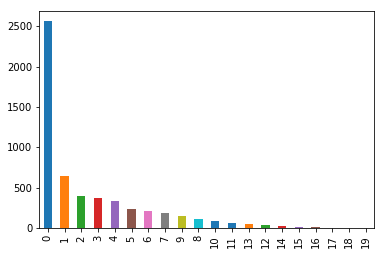

In [19]:
# Calculate the average number of hashtags in a bot description
#
bot_average_hashtags = sum(bot_df['hashtag_count']) / len(bot_df)
print("On average a bot has ", str(round(bot_average_hashtags, 2)), "hashtags in their description")

# Calculate standard deviation of hashtag count
#
print("Hashtag count standard deviation for bots: ", bot_df['hashtag_count'].std())

# Calculate the range of hashtag count
#
bot_max_hashtags = bot_df['hashtag_count'].max()
bot_min_hashtags = bot_df['hashtag_count'].min()
print("Bot followering count ranges from ",bot_min_hashtags, "-", bot_max_hashtags)

# Graph the frequency of each # count
#
fig, ax = plt.subplots()
bot_df['hashtag_count'].value_counts().nlargest(20).plot(ax=ax, kind='bar')


On average a bot has  0.32 @ mentions in their description
@ mention count standard deviation for bots:  1.1446398443056334
Bot followering count ranges from  0 - 11


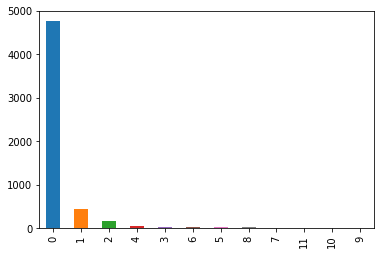

In [21]:
# Calculate the average number of @ mentions in a bot description
#
bot_average_mentions = sum(bot_df['at_mention_count']) / len(bot_df)
print("On average a bot has ", str(round(bot_average_mentions, 2)), "@ mentions in their description")

# Calculate standard deviation of @ mention count
#
print("@ mention count standard deviation for bots: ", bot_df['at_mention_count'].std())

# Calculate the range of @ mention count
#
bot_max_mentions = bot_df['at_mention_count'].max()
bot_min_mentions = bot_df['at_mention_count'].min()
print("Bot followering count ranges from ",bot_min_mentions, "-", bot_max_mentions)

# Graph the frequency of each @ mention count
#
fig, ax = plt.subplots()
bot_df['at_mention_count'].value_counts().nlargest(20).plot(ax=ax, kind='bar')

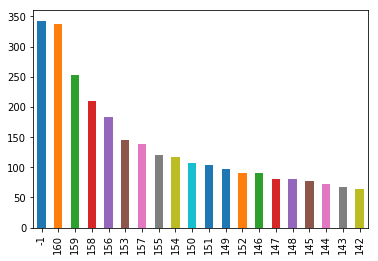

In [32]:
fig, ax = plt.subplots()
bot_df['description_length'].value_counts().nlargest(20).plot(ax=ax, kind='bar')
# 160 is the longest a user description can be
#